In [2]:
# importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import plotly.graph_objects as go

In [3]:
# connecting the database
conn = sqlite3.connect('database.sqlite')
c = conn.cursor()

# Data Cleaning

# Creating a dataset of all the data

In [4]:
data = pd.read_sql_query("""select C.name as Country_name,
L.name as League_name,
M.season as Season,
M.date as Match_date,
home_team.team_long_name as Home_team_name, 
away_team.team_long_name as Away_team_name,
M.Home_team_goal as home_team_goal,
M.away_team_goal as away_team_goal,
M.match_api_id as match_id
from Match M 
INNER JOIN 
Country as C ON
M.country_id = C.id
Inner join
League as L ON
M.league_id = L.id
left join
Team as home_team 
on
home_team.team_api_id = M.home_team_api_id
left join
Team as away_team
on
away_team.team_api_id = M.away_team_api_id;""",conn)
data

,Country_name,League_name,Season,Match_date,Home_team_name,Away_team_name,home_team_goal,away_team_goal,match_id
0,Belgium,Belgium Jupiler League,2008/2009,2008-08-17 00:00:00,KRC Genk,Beerschot AC,1,1,492473
1,Belgium,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0,492474
2,Belgium,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3,492475
3,Belgium,Belgium Jupiler League,2008/2009,2008-08-17 00:00:00,KAA Gent,RAEC Mons,5,0,492476
4,Belgium,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3,492477
...,...,...,...,...,...,...,...,...,...
25974,Switzerland,Switzerland Super League,2015/2016,2015-09-22 00:00:00,FC St. Gallen,FC Thun,1,0,1992091
25975,Switzerland,Switzerland Super League,2015/2016,2015-09-23 00:00:00,FC Vaduz,FC Luzern,1,2,1992092
25976,Switzerland,Switzerland Super League,2015/2016,2015-09-23 00:00:00,Grasshopper Club Zürich,FC Sion,2,0,1992093
25977,Switzerland,Switzerland Super League,2015/2016,2015-09-22 00:00:00,Lugano,FC Zürich,0,0,1992094


In [5]:
data.isnull().sum()

Country_name      0
League_name       0
Season            0
Match_date        0
Home_team_name    0
Away_team_name    0
home_team_goal    0
away_team_goal    0
match_id          0
dtype: int64

The result above shows that we have no missing data in any of the columns in the dataset 

In [6]:
data.duplicated().sum()

0

The result above shows that we have no duplicated rows in the data

In [7]:
data.dtypes

Country_name      object
League_name       object
Season            object
Match_date        object
Home_team_name    object
Away_team_name    object
home_team_goal     int64
away_team_goal     int64
match_id           int64
dtype: object

# Exploratory Data Analysis

In [8]:
# printing all the tables present in database.sqlite 
for row in c.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(list(row))

['sqlite_sequence']
['Player_Attributes']
['Player']
['Match']
['League']
['Country']
['Team']
['Team_Attributes']


In [9]:
#Total number of matches 


total = pd.read_sql_query("SELECT count(*) as totalmatches from match", conn)
total

,totalmatches
0,25979


In [10]:
#Total number of countries
coun=pd.read_sql_query("SELECT COUNT(*) as num_of_countries FROM Country;",conn)
coun

,num_of_countries
0,11


In [11]:
#total number of players
players=pd.read_sql_query("SELECT COUNT(*) as num_of_players FROM Player;",conn)
players

,num_of_players
0,11060


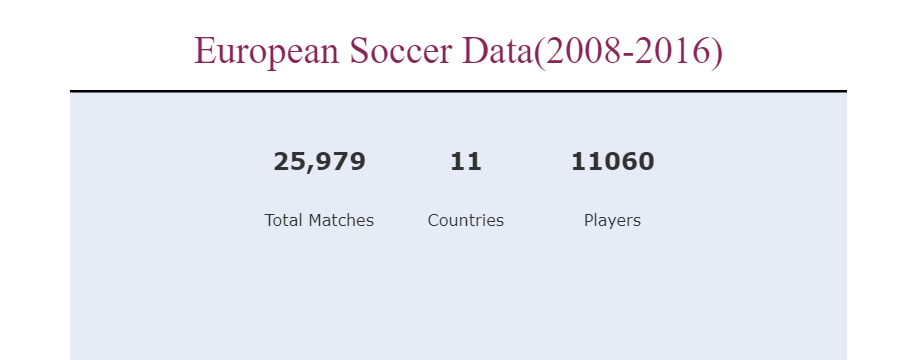

In [62]:

fig=go.Figure()
fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3],
    y=[1.6, 1.6, 1.6, 1.6],
    mode="text", 
    text=["<span style='font-size:24px'><b>25,979</b></span>", 
          "<span style='font-size:24px'><b>11</b></span>",
          "<span style='font-size:24px'><b>11060</b></span>",
          
          ],
    textposition="bottom center"
))
fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3],
    y=[1.1, 1.1, 1.1, 1.1],
    mode="text", 
    text=["Total Matches", "Countries", "Players"],
    textposition="bottom center"
))
fig.add_hline(y=2.2, line_width=5, line_color='black')
fig.update_yaxes(visible=False)
fig.update_xaxes(visible=False)
fig.update_layout(showlegend=False,height=200,width=700,title='European Soccer Data(2008-2016)',title_x=0.5,title_y=0.9,xaxis_range=[-1.7,3.6],yaxis_range=[-0.2,2.2],
                font=dict(size=16, color='#323232'),title_font=dict(size=38, color='#872657', family='Proxima Nova'),margin=dict(t=90,l=70,b=0,r=70), 
    )

# The Player table

In [7]:
player = pd.read_sql_query(
    '''
        SELECT * FROM Player_Attributes
        LIMIT 5
    ''', conn, index_col='id'
)
player

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67,71,right,medium,medium,49,44,...,54,48,65,69,69,6,11,10,8,8
2,218353,505942,2015-11-19 00:00:00,67,71,right,medium,medium,49,44,...,54,48,65,69,69,6,11,10,8,8
3,218353,505942,2015-09-21 00:00:00,62,66,right,medium,medium,49,44,...,54,48,65,66,69,6,11,10,8,8
4,218353,505942,2015-03-20 00:00:00,61,65,right,medium,medium,48,43,...,53,47,62,63,66,5,10,9,7,7
5,218353,505942,2007-02-22 00:00:00,61,65,right,medium,medium,48,43,...,53,47,62,63,66,5,10,9,7,7


In [8]:
# selecting first five rows from match table
match = pd.read_sql_query(
    '''
        SELECT * FROM Match
        LIMIT 5
    ''', conn, index_col='id'
)
match

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
id,,,,,,,,,,,,,,,,,,,,,
1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [9]:
# selecting first five rows from country table
league = pd.read_sql_query(
    '''
        SELECT * FROM Country
        LIMIT 5
    ''', conn, index_col='id'
)
league

,name
id,
1,Belgium
1729,England
4769,France
7809,Germany
10257,Italy


In [10]:
# selecting first five rows from league table
league = pd.read_sql_query(
    '''
        SELECT * FROM League
        LIMIT 5
    ''', conn, index_col='id'
)
league

,country_id,name
id,,
1,1,Belgium Jupiler League
1729,1729,England Premier League
4769,4769,France Ligue 1
7809,7809,Germany 1. Bundesliga
10257,10257,Italy Serie A


### Number teams each country have

In [18]:

q1 = pd.read_sql_query(
    '''
        SELECT 
              ct.name AS Country,
              COUNT(DISTINCT(team_long_name)) AS 'num of teams'
              FROM Match AS ma
              LEFT JOIN Country AS ct
              ON ma.country_id = ct.id
              LEFT JOIN Team AS t 
              ON ma.home_team_api_id = t.team_api_id
              GROUP BY Country
    ''', conn
)
q1


,Country,num of teams
0,Belgium,24
1,England,34
2,France,35
3,Germany,30
4,Italy,32
5,Netherlands,25
6,Poland,22
7,Portugal,29
8,Scotland,17
9,Spain,33


[Text(0, 0, '24'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '30'),
 Text(0, 0, '32'),
 Text(0, 0, '25'),
 Text(0, 0, '22'),
 Text(0, 0, '29'),
 Text(0, 0, '17'),
 Text(0, 0, '33'),
 Text(0, 0, '15')]

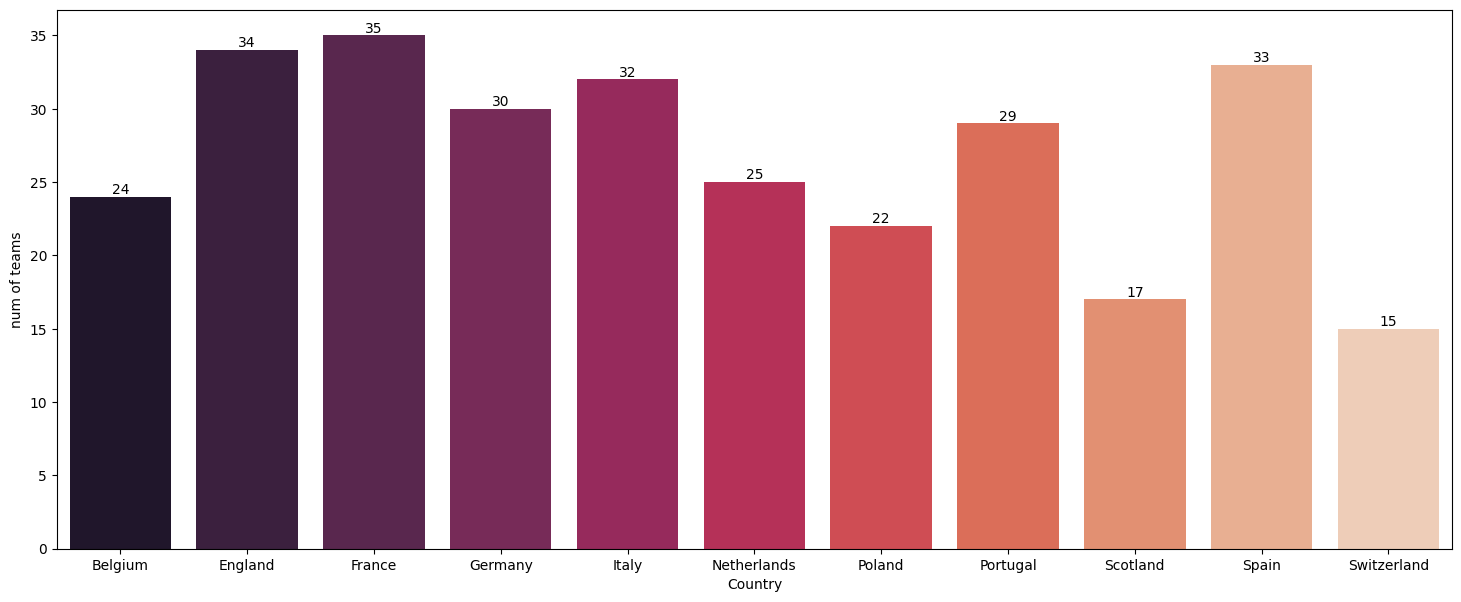

In [19]:
plt.figure(figsize = (18,7))
ax=sns.barplot(x = 'Country', y = 'num of teams', data = q1, palette='rocket');

ax.bar_label(ax.containers[0])

### matches played per season

[Text(0, 0, '3326'),
 Text(0, 0, '3230'),
 Text(0, 0, '3260'),
 Text(0, 0, '3220'),
 Text(0, 0, '3260'),
 Text(0, 0, '3032'),
 Text(0, 0, '3325'),
 Text(0, 0, '3326')]

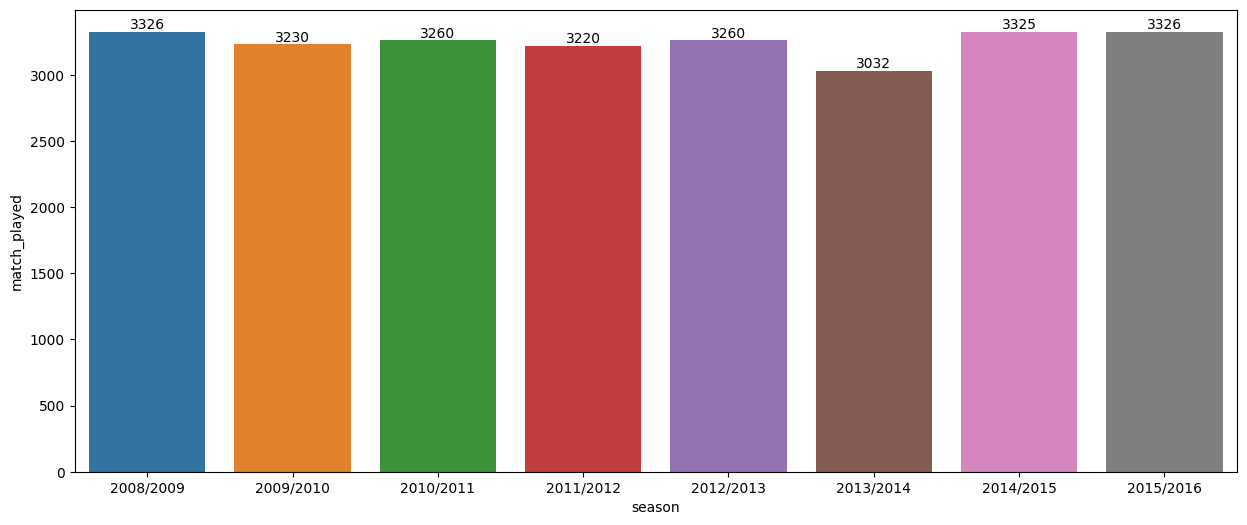

In [24]:

matchperseason = pd.read_sql_query("SELECT season, count(*) match_played from match group by season", conn)
plt.figure(figsize = (15,6))

ax = sns.barplot(x = 'season', y = 'match_played', data = matchperseason)

ax.bar_label(ax.containers[0])

### total goals scored by home team grouped by country and Season

In [27]:

query1 = pd.read_sql_query(
    '''
        SELECT ct.name AS Country,
               ma.season AS Season,
               SUM(ma.home_team_goal) AS 'home goals',
               SUM(ma.away_team_goal) AS 'away goals'
        FROM Match as ma 
        LEFT JOIN country AS ct
        ON ma.country_id = ct.id
        GROUP BY Country, Season    
        ORDER BY Country     
    ''', conn
)
query1

,Country,Season,home goals,away goals
0,Belgium,2008/2009,499,356
1,Belgium,2009/2010,308,257
2,Belgium,2010/2011,382,253
3,Belgium,2011/2012,421,270
4,Belgium,2012/2013,375,328
...,...,...,...,...
83,Switzerland,2011/2012,235,190
84,Switzerland,2012/2013,272,190
85,Switzerland,2013/2014,290,230
86,Switzerland,2014/2015,289,228


### goals scored by each team grouped by season

In [15]:

q2 = pd.read_sql_query(
    '''
        SELECT t.team_long_name AS Team, 
               ma.season as Season,
               SUM(ma.home_team_goal) AS 'home goals',
               SUM(ma.away_team_goal) AS 'away goals'
        FROM Match AS ma
        LEFT JOIN Team AS t
        ON m.home_team_api_id = t.team_api_id 
        GROUP BY Team, Season
        ORDER BY Team
    ''', conn
)
q2

,Team,Season,Home Goal,Away Goal
0,1. FC Kaiserslautern,2010/2011,25,19
1,1. FC Kaiserslautern,2011/2012,12,28
2,1. FC Köln,2008/2009,14,25
3,1. FC Köln,2009/2010,18,29
4,1. FC Köln,2010/2011,30,21
...,...,...,...,...
1473,Śląsk Wrocław,2011/2012,26,14
1474,Śląsk Wrocław,2012/2013,23,15
1475,Śląsk Wrocław,2013/2014,21,16
1476,Śląsk Wrocław,2014/2015,21,9


In [30]:
q3 = pd.read_sql_query(
    '''
        SELECT ct.name AS Country,
               t.team_long_name AS Team,
               ma.season AS Season,
               SUM(ma.home_team_goal) AS 'home goals',
               SUM(ma.away_team_goal) AS 'away goals'
        FROM Match as ma
        LEFT JOIN Country AS ct
        ON ma.country_id = ct.id
        LEFT JOIN Team AS t
        ON ma.home_team_api_id = t.team_api_id
        GROUP BY Country, Team, Season
        ORDER BY Country
    ''', conn
)
q3

,Country,Team,Season,home goals,away goals
0,Belgium,Beerschot AC,2008/2009,32,19
1,Belgium,Beerschot AC,2009/2010,20,22
2,Belgium,Beerschot AC,2010/2011,14,10
3,Belgium,Beerschot AC,2011/2012,26,13
4,Belgium,Beerschot AC,2012/2013,20,34
...,...,...,...,...,...
1473,Switzerland,Neuchâtel Xamax,2009/2010,35,27
1474,Switzerland,Neuchâtel Xamax,2010/2011,23,35
1475,Switzerland,Neuchâtel Xamax,2011/2012,12,10
1476,Switzerland,Servette FC,2011/2012,23,27


<AxesSubplot: xlabel='name', ylabel='NUMOFWINS'>

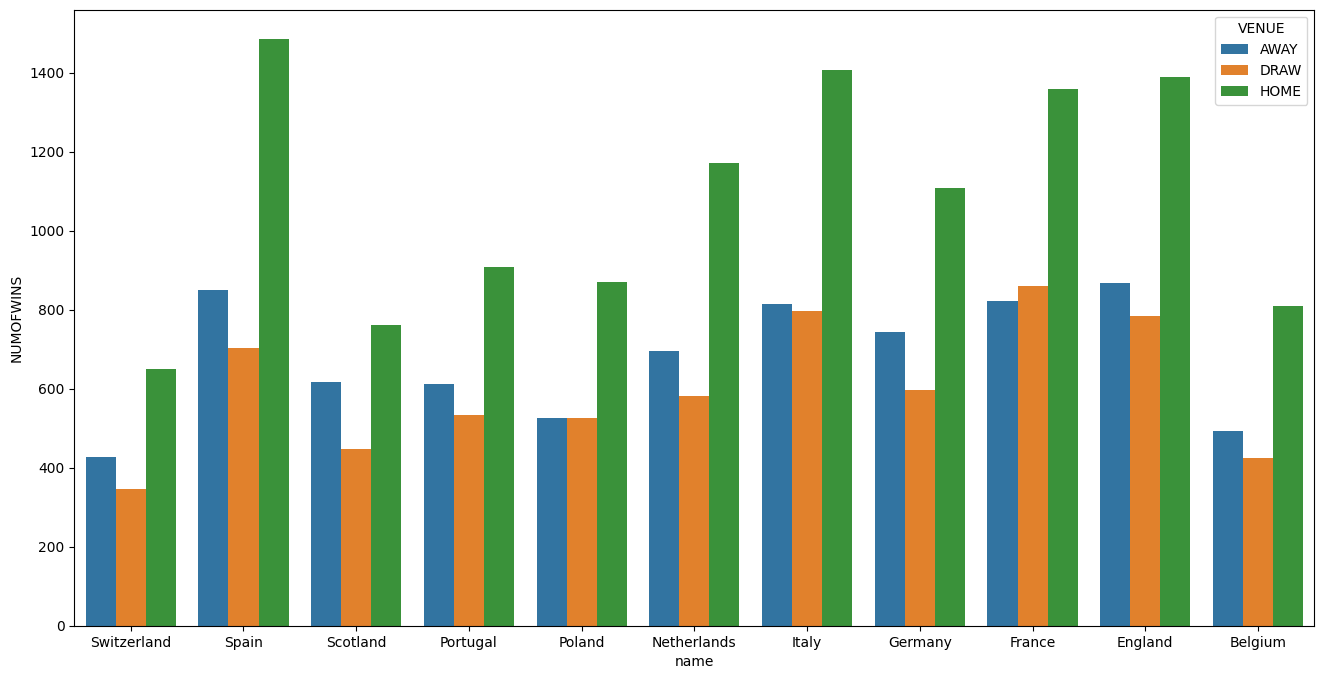

In [33]:
# is it true that teams perform better on home ground.


q_hwd = pd.read_sql_query("SELECT ct.name, case when ma.home_team_goal > ma.away_team_goal Then'HOME'\
                               when ma.home_team_goal < ma.away_team_goal Then 'AWAY'\
                        else 'DRAW' end as VENUE,\
                        count(*) as NUMOFWINS\
                    FROM\
                        Match as ma\
                        join Country as ct\
                        on ct.id = ma.country_id\
                    group by ct.name, VENUE\
                    order by ct.name desc", conn)

plt.figure(figsize = (16,8))
sns.barplot(x = 'name', y = 'NUMOFWINS', data = q_hwd, hue = 'VENUE' )


In [34]:
q_hwd

,name,VENUE,NUMOFWINS
0,Switzerland,AWAY,426
1,Switzerland,DRAW,346
2,Switzerland,HOME,650
3,Spain,AWAY,851
4,Spain,DRAW,704
5,Spain,HOME,1485
6,Scotland,AWAY,617
7,Scotland,DRAW,447
8,Scotland,HOME,760
9,Portugal,AWAY,611


### count of matches won, lost and tie

In [37]:

q4 = pd.read_sql_query(
    '''
    WITH subquery AS (
        SELECT     
                   ct.name AS Country,
                   t.team_long_name AS teamname,
                   COUNT(CASE WHEN ma.home_team_goal > ma.away_team_goal THEN 'Win' END) AS Won,
                   COUNT(CASE WHEN ma.home_team_goal < ma.away_team_goal THEN 'Lost' END) AS Lost,
                   COUNT(CASE WHEN ma.home_team_goal = ma.away_team_goal THEN 'Tie' END) AS Tie
         FROM Match AS ma
         LEFT JOIN Country AS ct
         ON ma.country_id = ct.id
         LEFT JOIN Team as t
         ON ma.home_team_api_id = t.team_api_id
         GROUP BY Country, teamname
         ORDER BY Country
         )
         SELECT ROW_NUMBER() OVER(ORDER BY Won DESC) AS 'Row No.',
                Country, 
                teamname, 
                Won, 
                Lost,
                Tie
        FROM subquery
    ''', conn, index_col='Row No.'
    )
q4

,Country,teamname,Won,Lost,Tie
Row No.,,,,,
1,Spain,FC Barcelona,131,9,12
2,Spain,Real Madrid CF,129,12,11
3,Scotland,Celtic,120,9,23
4,England,Manchester United,116,20,16
5,England,Manchester City,113,21,18
...,...,...,...,...,...
292,Germany,DSC Arminia Bielefeld,2,7,8
293,Germany,SV Darmstadt 98,2,9,6
294,Scotland,Dunfermline Athletic,1,11,7


### total home goals scored grouped by country and team

In [38]:

q5 = pd.read_sql_query(
    '''
        SELECT name AS Name,
            team_long_name AS teamname,
            --STRFTIME('%Y', date) AS Year, 
            SUM(home_team_goal) AS goals
        FROM Match AS ma
        LEFT JOIN Country as ct
        ON ma.country_id = ct.id
        LEFT JOIN Team AS t
        ON ma.home_team_api_id = t.team_api_id  
        GROUP BY Name, teamname
        ORDER BY goals DESC
        
    ''', conn
)
q5

,Name,teamname,goals
0,Spain,Real Madrid CF,505
1,Spain,FC Barcelona,495
2,Scotland,Celtic,389
3,Germany,FC Bayern Munich,382
4,Netherlands,PSV,370
...,...,...,...
291,France,AC Arles-Avignon,14
292,Portugal,Trofense,14
293,Portugal,Feirense,13
294,Spain,Córdoba CF,12


### total goals scored grouped by country and year

In [58]:

q6 = pd.read_sql_query(
    '''
        WITH yearwisetable AS (
            SELECT country_id, STRFTIME('%Y', date) AS Yearofmatch, home_team_goal AS Goal
            FROM Match
        )
        SELECT name AS name, yearofmatch , SUM(Goal) AS goals
        FROM yearwisetable as yr
        LEFT JOIN Country as ct
        ON yr.country_id = ct.id
        GROUP BY name, yearofmatch
        
    ''', conn
)
q6


,name,Yearofmatch,goals
0,Belgium,2008,262
1,Belgium,2009,452
2,Belgium,2010,371
3,Belgium,2011,362
4,Belgium,2012,454
...,...,...,...
94,Switzerland,2012,222
95,Switzerland,2013,286
96,Switzerland,2014,289
97,Switzerland,2015,313


In [43]:

q7 = pd.read_sql_query(
    '''
        select season, count(distinct(match_api_id)) as match_counts from match group by season
    ''', conn
)
q7

,season,match_counts
0,2008/2009,3326
1,2009/2010,3230
2,2010/2011,3260
3,2011/2012,3220
4,2012/2013,3260
5,2013/2014,3032
6,2014/2015,3325
7,2015/2016,3326


In [23]:
for container in ax.containers:
    ax.bar_label(container)
ax

<AxesSubplot:xlabel='season', ylabel='matches_played'>

## The season of 2015/2016 was the one that had the most matches.

In [99]:
q8  = pd.read_sql_query(
    ''' SELECT  t.team_long_name AS Team,
                COUNT(CASE WHEN ma.home_team_goal > away_team_goal THEN 'Win' END) AS Won,
                COUNT(CASE WHEN ma.home_team_goal < away_team_goal THEN 'Lost' END) AS Lost,
                COUNT(CASE WHEN ma.home_team_goal = away_team_goal THEN 'Tie' END) AS Tie
         FROM Match AS ma
         LEFT JOIN Team as t
         ON ma.home_team_api_id = t.team_api_id where season = '2015/2016'
         GROUP BY Team order by Won desc, Lost asc, Tie desc limit 10
    ''', conn)
q8

,Team,Won,Lost,Tie
0,Napoli,16,0,3
1,Juventus,16,1,2
2,FC Barcelona,16,2,1
3,Real Madrid CF,16,2,1
4,Atlético Madrid,15,1,3
5,Paris Saint-Germain,15,1,3
6,FC Bayern Munich,15,1,1
7,SL Benfica,15,2,0
8,Borussia Dortmund,14,0,3
9,Celtic,14,1,4


In [ ]:
### By looking at the data, napoli as the best team of 2015/2016 season with 16 victories, 0 ties, and 3 loss, 

In [54]:
q8['Team'].nunique()

10

In [26]:
# query8.set_index('Team')

In [55]:
q8

,Team,Won,Lost,Tie
0,Napoli,16,0,3
1,Juventus,16,1,2
2,FC Barcelona,16,2,1
3,Real Madrid CF,16,2,1
4,Atlético Madrid,15,1,3
5,Paris Saint-Germain,15,1,3
6,FC Bayern Munich,15,1,1
7,SL Benfica,15,2,0
8,Borussia Dortmund,14,0,3
9,Celtic,14,1,4


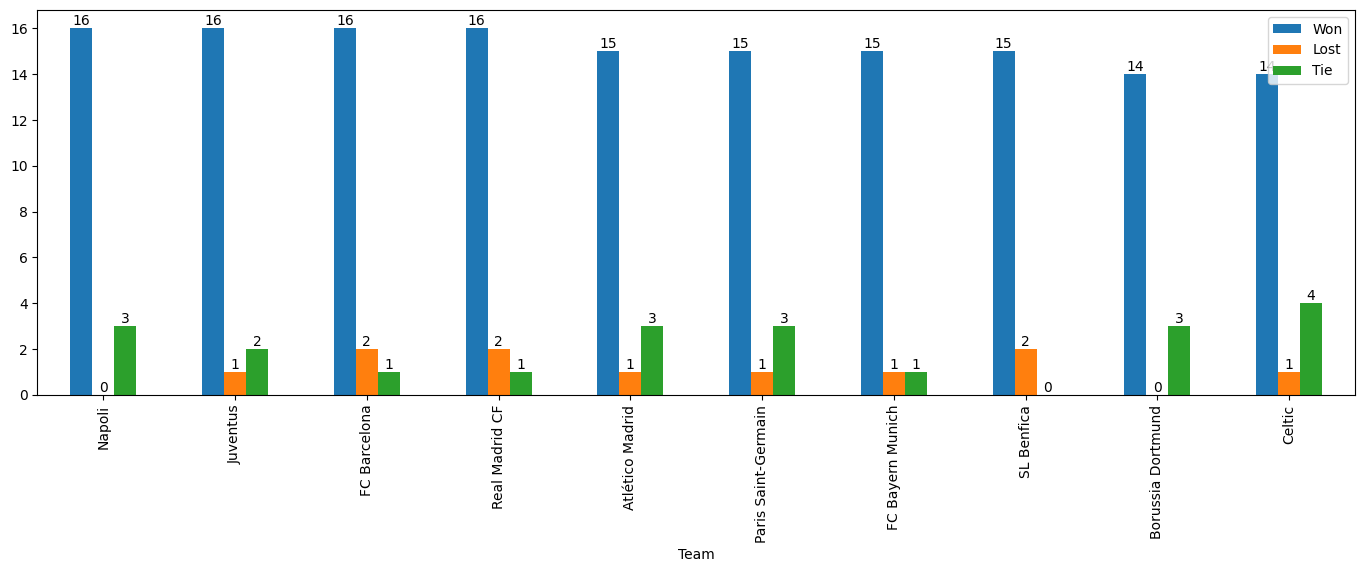

In [57]:
ax = q8.plot.bar(x= 'Team', y = ['Won','Lost','Tie'],figsize = (17,5))
for container in ax.containers:
    ax.bar_label(container)


## Who scores the most goals, wins the championship?

In [47]:
q9 = pd.read_sql_query(
    '''
    WITH sub_query AS (
        SELECT     
                   ct.name AS Country,
                   t.team_long_name AS Team,
                   COUNT(CASE WHEN ma.home_team_goal > away_team_goal THEN 'Win' END) AS Won,
                   COUNT(CASE WHEN ma.home_team_goal < away_team_goal THEN 'Lost' END) AS Lost,
                   COUNT(CASE WHEN ma.home_team_goal = away_team_goal THEN 'Tie' END) AS Tie
         FROM Match AS ma
         LEFT JOIN Country AS ct
         ON ma.country_id = ct.id
         LEFT JOIN Team as t
         ON ma.home_team_api_id = t.team_api_id
         GROUP BY Country, Team
         ORDER BY Country
         )
         SELECT ROW_NUMBER() OVER(ORDER BY Won DESC) AS 'Row no.',
                Country, 
                Team, 
                Won, 
                Lost,
                Tie
        FROM sub_query
    ''', conn, index_col='Row no.'
    )
q9

,Country,Team,Won,Lost,Tie
Row Number,,,,,
1,Spain,FC Barcelona,131,9,12
2,Spain,Real Madrid CF,129,12,11
3,Scotland,Celtic,120,9,23
4,England,Manchester United,116,20,16
5,England,Manchester City,113,21,18
...,...,...,...,...,...
292,Germany,DSC Arminia Bielefeld,2,7,8
293,Germany,SV Darmstadt 98,2,9,6
294,Scotland,Dunfermline Athletic,1,11,7


### For each combination of league and team, finding no. of matches won ,lost ,tie

In [102]:
q_9 = pd.read_sql_query(
    '''
    WITH sub_query AS (
        SELECT     
                   l.name AS League,
                   t.team_long_name AS Team,
                   COUNT(CASE WHEN ma.home_team_goal > away_team_goal THEN 'Win' END) AS Won,
                   COUNT(ma.home_team_goal) AS total_goals,
                   COUNT(CASE WHEN ma.home_team_goal < away_team_goal THEN 'Lost' END) AS Lost,
                   COUNT(CASE WHEN ma.home_team_goal = away_team_goal THEN 'Tie' END) AS Tie
         FROM Match AS ma
         LEFT JOIN League AS l
         ON ma.country_id = l.id
         LEFT JOIN Team as t
         ON ma.home_team_api_id = t.team_api_id
         GROUP BY League, Team
         ORDER BY League
         
         )
         
         SELECT ROW_NUMBER() OVER(ORDER BY Won DESC) AS 'Row No.',
                League, 
                Team, 
                Won,
                total_goals,
                Lost,
                Tie
        FROM sub_query
        
    ''', conn
    )
q_9

,Row No.,League,Team,Won,total_goals,Lost,Tie
0,1,Spain LIGA BBVA,FC Barcelona,131,152,9,12
1,2,Spain LIGA BBVA,Real Madrid CF,129,152,12,11
2,3,Scotland Premier League,Celtic,120,152,9,23
3,4,England Premier League,Manchester United,116,152,20,16
4,5,England Premier League,Manchester City,113,152,21,18
...,...,...,...,...,...,...,...
291,292,Germany 1. Bundesliga,DSC Arminia Bielefeld,2,17,7,8
292,293,Germany 1. Bundesliga,SV Darmstadt 98,2,17,9,6
293,294,Scotland Premier League,Dunfermline Athletic,1,19,11,7
294,295,Spain LIGA BBVA,Córdoba CF,1,19,12,6


### in each league,most probably the team with more overall goals will be in top place with more wins

### Finding average total goals for each league

In [63]:
q10 = pd.read_sql_query(
    '''
        SELECT     
                   l.name AS League,
                   avg(ma.home_team_goal) AS avg_total_goals
         FROM Match AS ma
         LEFT JOIN League AS l
         ON ma.country_id = l.id
         where ma.season = '2014/2015'
         GROUP BY League       
         ORDER BY League

    ''', conn
    )
q10

,League,avg_total_goals
0,Belgium Jupiler League,1.566667
1,England Premier League,1.473684
2,France Ligue 1,1.410526
3,Germany 1. Bundesliga,1.588235
4,Italy Serie A,1.498681
5,Netherlands Eredivisie,1.692810
6,Poland Ekstraklasa,1.516667
7,Portugal Liga ZON Sagres,1.450980
8,Scotland Premier League,1.447368
9,Spain LIGA BBVA,1.536842


[Text(0, 0, '1.56667'),
 Text(0, 0, '1.47368'),
 Text(0, 0, '1.41053'),
 Text(0, 0, '1.58824'),
 Text(0, 0, '1.49868'),
 Text(0, 0, '1.69281'),
 Text(0, 0, '1.51667'),
 Text(0, 0, '1.45098'),
 Text(0, 0, '1.44737'),
 Text(0, 0, '1.53684'),
 Text(0, 0, '1.60556')]

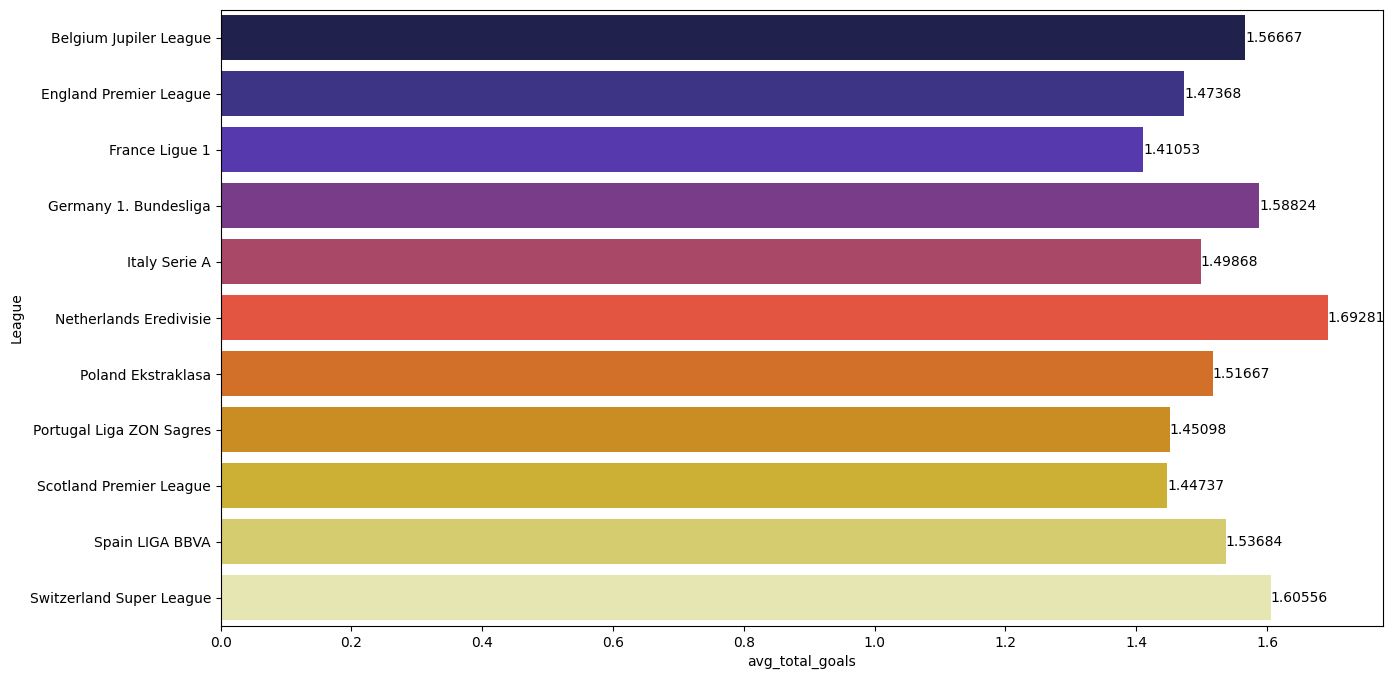

In [64]:
plt.figure(figsize = (15,8))
ax=sns.barplot(x = 'avg_total_goals', y = 'League', data = q10, palette='CMRmap');

ax.bar_label(ax.containers[0])

In [33]:
q11  = pd.read_sql_query(
    ''' SELECT * from player_attributes
    ''', conn)
q11

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


### finding count of players with different preferred foot and average of overall rating of those players

In [65]:
query_11  = pd.read_sql_query(
    ''' SELECT preferred_foot,count(player_api_id) as count , avg(overall_rating) as avg_overall_rating from player_attributes group by preferred_foot
    ''', conn)
query_11

,preferred_foot,count,avg_overall_rating
0,None,836,NaN
1,left,44733,68.626182
2,right,138409,68.591558


[Text(0, 0, '44733'), Text(0, 0, '138409')]

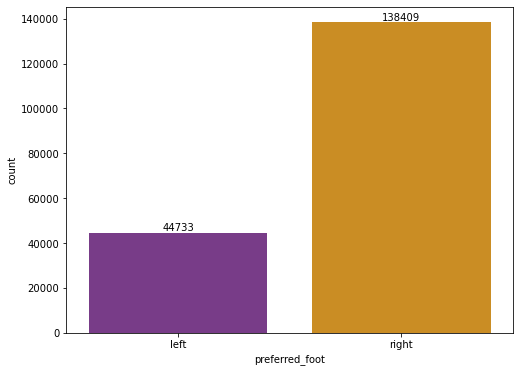

In [35]:
plt.figure(figsize = (8,6))
ax=sns.barplot(x = 'preferred_foot', y = 'count', data = query10, palette='CMRmap');

ax.bar_label(ax.containers[0])

### average rating of each player

In [66]:
query11  = pd.read_sql_query(
    ''' SELECT player_api_id, avg(overall_rating) as average_rating from player_attributes group by player_fifa_api_id
    ''', conn)
query11

,player_api_id,average_rating
0,39357,70.600000
1,41762,72.125000
2,26028,67.352941
3,24852,74.125000
4,30630,76.500000
...,...,...
11057,705484,52.000000
11058,674492,58.000000
11059,746419,59.000000
11060,748432,58.000000


## Which league belongs to which country

In [69]:
#Since there are no missing values, I am going to use an inner join

Cntry_League = pd.read_sql("""SELECT League.name AS LeagueName, Country.name AS CountryName
                        FROM League
                        JOIN Country ON Country.id = League.country_id;""", conn)
Cntry_League

,LeagueName,CountryName
0,Belgium Jupiler League,Belgium
1,England Premier League,England
2,France Ligue 1,France
3,Germany 1. Bundesliga,Germany
4,Italy Serie A,Italy
5,Netherlands Eredivisie,Netherlands
6,Poland Ekstraklasa,Poland
7,Portugal Liga ZON Sagres,Portugal
8,Scotland Premier League,Scotland
9,Spain LIGA BBVA,Spain


### What teams played in each league and corresponding season

In [70]:
League_Team_Season = pd.read_sql("""SELECT League.name AS League_Name, 
                                        home_t.team_long_name AS Home_Team,
                                        Away_t.team_long_name AS Away_Team,
                                        ma.season AS Season
                                    
                                FROM Match ma
                                JOIN League on League.id = ma.league_id
                                LEFT JOIN Team AS home_t on home_t.team_api_id = ma.home_team_api_id
                                LEFT JOIN Team AS away_t on away_t.team_api_id = ma.away_team_api_id
                                GROUP BY League.name, home_t.team_long_name, ma.season
                                ORDER BY League.name, home_t.team_long_name, ma.season DESC
                                ;""", conn)

League_Team_Season.head()

,League_Name,Home_Team,Away_Team,Season
0,Belgium Jupiler League,Beerschot AC,Sporting Lokeren,2012/2013
1,Belgium Jupiler League,Beerschot AC,KV Mechelen,2011/2012
2,Belgium Jupiler League,Beerschot AC,Lierse SK,2010/2011
3,Belgium Jupiler League,Beerschot AC,KVC Westerlo,2009/2010
4,Belgium Jupiler League,Beerschot AC,RSC Anderlecht,2008/2009


### finding no of home teams in each league during each season

In [73]:
Count_League_Team_Season = pd.read_sql("""SELECT League.name AS League_Name, 
                                        count(distinct home_t.team_long_name) AS Number_of_Home_Teams,
                                        ma.season AS match_Season
                                    
                                FROM Match ma
                                JOIN League on League.id = ma.league_id
                                LEFT JOIN Team AS home_t on home_t.team_api_id = ma.home_team_api_id
                                LEFT JOIN Team AS away_t on away_t.team_api_id = ma.away_team_api_id
                                GROUP BY League.name,  ma.season
                                ORDER BY League.name, ma.season ASC
                                ;""", conn)

Count_League_Team_Season.dtypes

League_Name             object
Number_of_Home_Teams     int64
match_Season            object
dtype: object

In [74]:
Count_League_Team_Season

,League_Name,Number_of_Home_Teams,match_Season
0,Belgium Jupiler League,18,2008/2009
1,Belgium Jupiler League,15,2009/2010
2,Belgium Jupiler League,16,2010/2011
3,Belgium Jupiler League,16,2011/2012
4,Belgium Jupiler League,16,2012/2013
...,...,...,...
83,Switzerland Super League,10,2011/2012
84,Switzerland Super League,10,2012/2013
85,Switzerland Super League,10,2013/2014
86,Switzerland Super League,10,2014/2015


### plotting  how number of home teams  varies for each leaue as season changes

Text(0.5, 1.0, 'Number of Teams in Each League During Each Season')

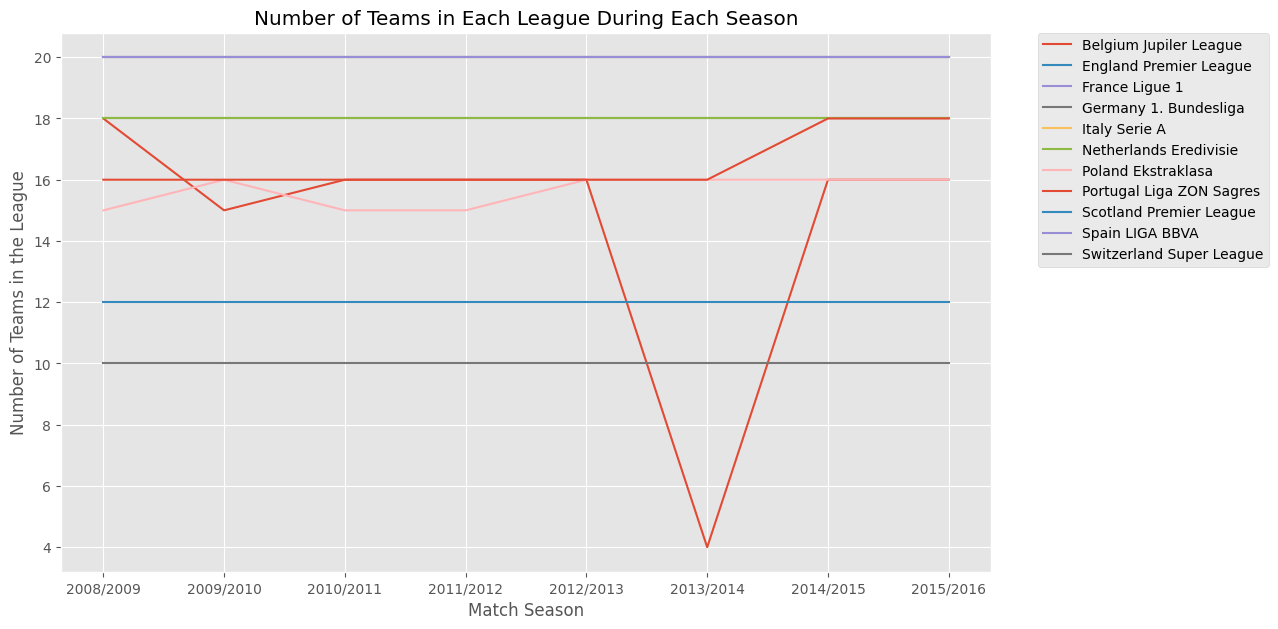

In [77]:
#Creating a numpy array for the x-axis of the plot
import numpy as np
seasons = np.array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)
seasons


import matplotlib.pyplot as plt
%matplotlib inline 

#set ggplot style
plt.style.use('ggplot')


# plot data
fig, ax = plt.subplots(figsize=(12,7))

# use unstack()
Count_League_Team_Season.groupby(['match_Season','League_Name']).sum()['Number_of_Home_Teams'].unstack().plot(ax=ax)
ax.set_xlabel('Match Season')
ax.set_ylabel('Number of Teams in the League')
plt.xticks(range(len(seasons)),seasons)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Number of Teams in Each League During Each Season')

####  one interesting insight is that the number of teams in all leagues are constant during different seasons except for "Belgium Jupiler League" which seems to have fluctuating teams during different seasons.
#### Poland Ekstraklasa and Portugal Liga ZON Sagres also have some fluctuations.

## lets check which four players for belgium jupiler league in 2013/2014

In [109]:
q_12 = pd.read_sql_query(
    '''
        SELECT     l.name AS League,
                   t.team_long_name AS Team
         FROM Match AS ma
         LEFT JOIN League AS l
         ON ma.country_id = l.id
         LEFT JOIN Team as t
         ON ma.home_team_api_id = t.team_api_id where ma.season = '2013/2014' and l.name = "Belgium Jupiler League" 
         GROUP BY League, Team
         ORDER BY League     
        
    ''', conn)
q_12

,League,Team
0,Belgium Jupiler League,KAA Gent
1,Belgium Jupiler League,KV Oostende
2,Belgium Jupiler League,Lierse SK
3,Belgium Jupiler League,Waasland-Beveren


### In 2013/2014 season there were only four teams, KAA Gent, KV Oostende, Lierse SK, Waasland-Beveren in Belgium Jupiler League.

In [115]:
q_13 = pd.read_sql_query(
    '''
        SELECT l.name AS League,
               avg(ma.home_team_goal) AS avg_goals
         FROM Match AS ma
         LEFT JOIN League AS l
         ON ma.country_id = l.id where ma.season = '2014/2015' 
         GROUP BY League
         ORDER BY avg_goals desc     
        
    ''', conn)
q_13

,League,avg_goals
0,Netherlands Eredivisie,1.692810
1,Switzerland Super League,1.605556
2,Germany 1. Bundesliga,1.588235
3,Belgium Jupiler League,1.566667
4,Spain LIGA BBVA,1.536842
5,Poland Ekstraklasa,1.516667
6,Italy Serie A,1.498681
7,England Premier League,1.473684
8,Portugal Liga ZON Sagres,1.450980
9,Scotland Premier League,1.447368


[Text(0, 0, '1.69281'),
 Text(0, 0, '1.60556'),
 Text(0, 0, '1.58824'),
 Text(0, 0, '1.56667'),
 Text(0, 0, '1.53684'),
 Text(0, 0, '1.51667'),
 Text(0, 0, '1.49868'),
 Text(0, 0, '1.47368'),
 Text(0, 0, '1.45098'),
 Text(0, 0, '1.44737'),
 Text(0, 0, '1.41053')]

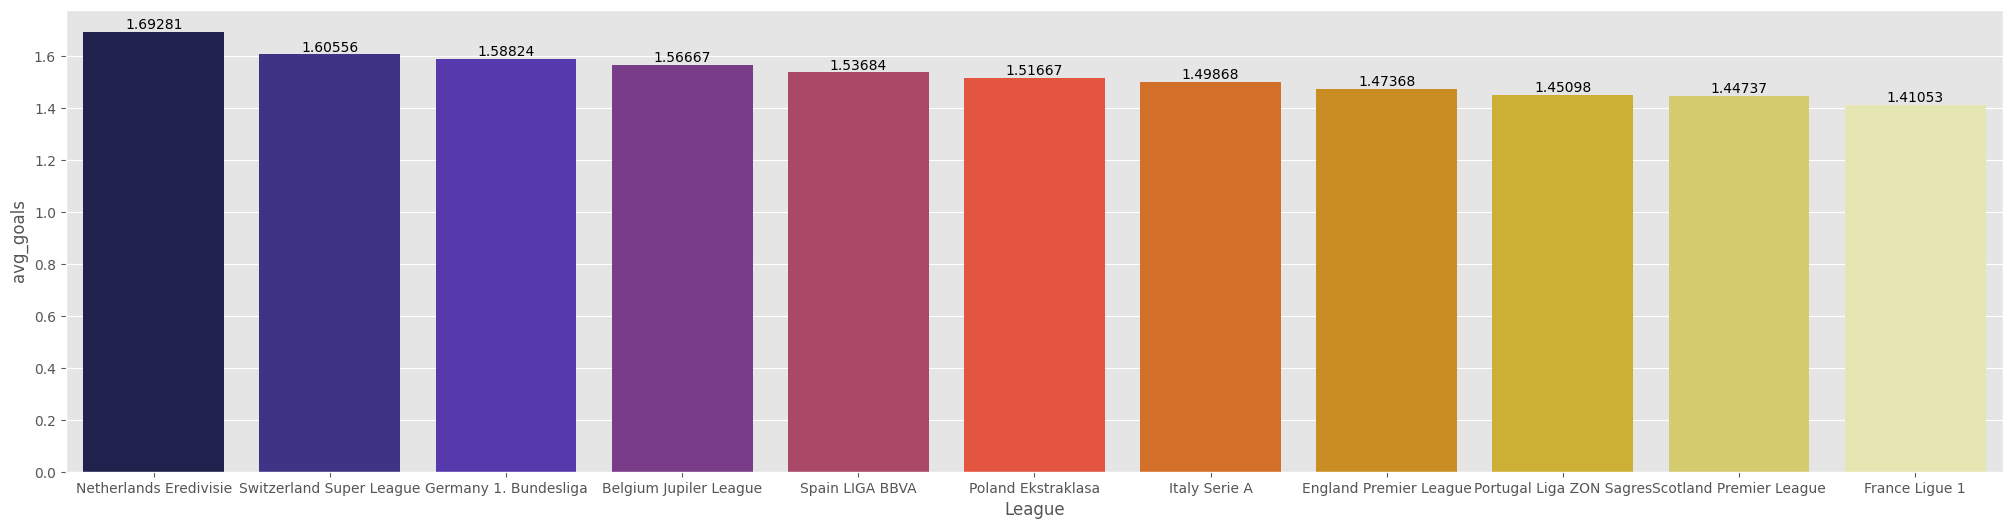

In [118]:
plt.figure(figsize = (25,6))
ax=sns.barplot(x = 'League', y = 'avg_goals', data = q_13, palette='CMRmap');

ax.bar_label(ax.containers[0])

### To vizualize the player attribute of one of best players cristiano_ronaldo 

In [78]:
Cristiano_Ronaldo = pd.read_sql("""SELECT player_name
                                    ,date
                                    ,overall_rating
                                    ,attacking_work_rate
                                    ,crossing
                                    ,finishing
                                    ,shot_power
                                    ,heading_accuracy
                                    ,free_kick_accuracy
                                    ,sprint_speed,agility
                                    
                        FROM Player 
                        LEFT JOIN Player_Attributes
                        on Player.player_api_id = Player_Attributes.player_api_id
                        
                        WHERE player_name = 'Cristiano Ronaldo'
                        
                       
                        ORDER by date
                        """, conn)



pd.set_option('display.max_columns', None)
Cristiano_Ronaldo.head()

,player_name,date,overall_rating,attacking_work_rate,crossing,finishing,shot_power,heading_accuracy,free_kick_accuracy,sprint_speed,agility
0,Cristiano Ronaldo,2007-02-22 00:00:00,87,high,80,71,80,74,64,93,94
1,Cristiano Ronaldo,2007-08-30 00:00:00,91,high,88,85,90,84,88,94,94
2,Cristiano Ronaldo,2008-08-30 00:00:00,91,high,89,92,92,82,94,94,94
3,Cristiano Ronaldo,2009-02-22 00:00:00,90,high,89,91,90,82,93,94,94
4,Cristiano Ronaldo,2009-08-30 00:00:00,89,high,86,90,91,88,88,92,94


C:\Users\WELCOME\AppData\Local\Temp\ipykernel_15104\71654321.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot( x = Cristiano_Ronaldo['date'], y = Cristiano_Ronaldo["overall_rating"], palette = 'Wistia', label="overall_rating")
C:\Users\WELCOME\AppData\Local\Temp\ipykernel_15104\71654321.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = Cristiano_Ronaldo['date'], y = Cristiano_Ronaldo["free_kick_accuracy"], palette = 'Wistia', label="free_kick_accuracy")
C:\Users\WELCOME\AppData\Local\Temp\ipykernel_15104\71654321.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = Cristiano_Ronaldo['date'], y = Cristiano_Ronaldo["sprint_speed"], palette = 'Wistia', label="sprint_speed")
C:\Users\WELCOME\AppData\Local\Temp\ipykernel_15104\71654321.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = Cristia

Text(0.5, 1.0, 'Cristiano Ronaldo from 2008 to 2015')

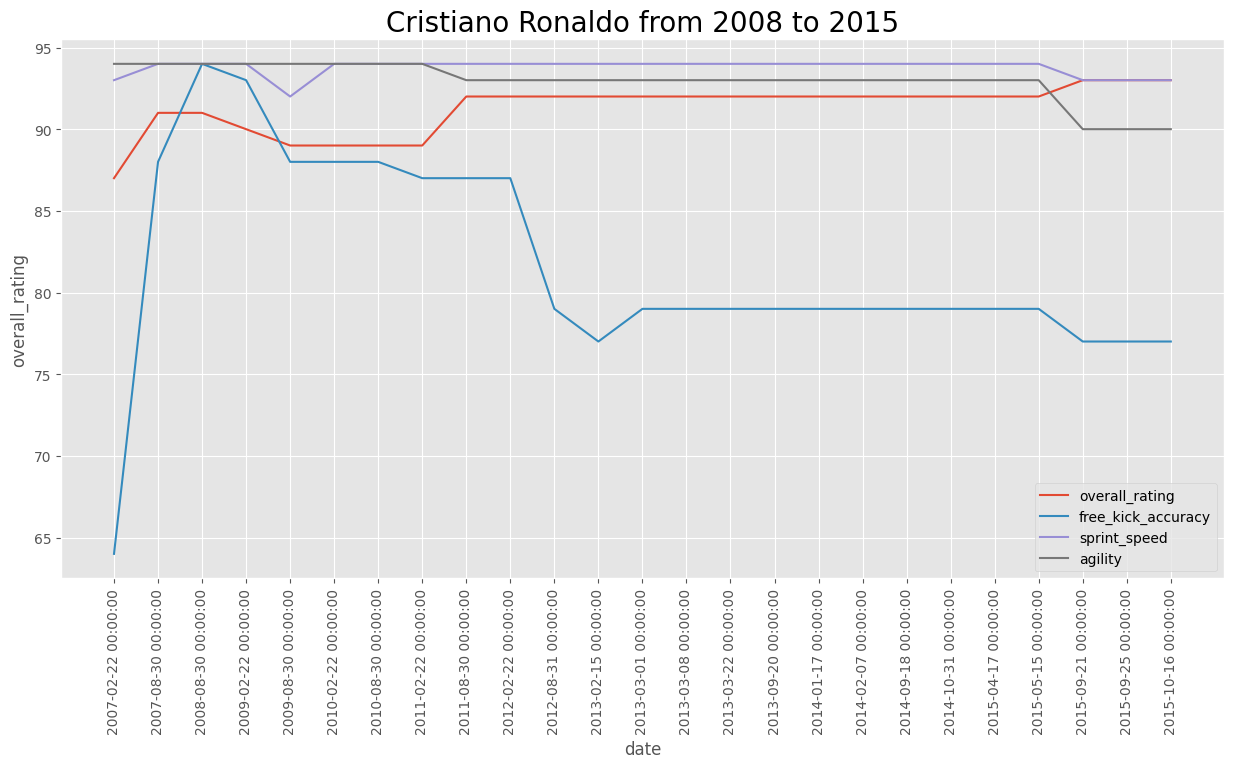

In [82]:

plt.figure(figsize=(15, 7))
sns.lineplot( x = Cristiano_Ronaldo['date'], y = Cristiano_Ronaldo["overall_rating"], palette = 'Wistia', label="overall_rating")
sns.lineplot(x = Cristiano_Ronaldo['date'], y = Cristiano_Ronaldo["free_kick_accuracy"], palette = 'Wistia', label="free_kick_accuracy")
sns.lineplot(x = Cristiano_Ronaldo['date'], y = Cristiano_Ronaldo["sprint_speed"], palette = 'Wistia', label="sprint_speed")
sns.lineplot(x = Cristiano_Ronaldo['date'], y = Cristiano_Ronaldo["agility"], palette = 'Wistia', label="agility")
plt.tick_params(axis='x', rotation=90)
plt.title("Cristiano Ronaldo from 2008 to 2015", fontsize=20)

In [84]:
#Top 5 players and their rating
top_players = pd.read_sql("""SELECT play.player_name, pl.player_api_id, ROUND(AVG(pl.overall_rating),2) AS avgRating
FROM Player play, Player_Attributes pl 
WHERE play.player_api_id = pl.player_api_id
GROUP BY play.player_api_id 
ORDER BY 3 DESC LIMIT 5;""",conn)
top_players


,player_name,player_api_id,avgRating
0,Lionel Messi,30981,92.19
1,Cristiano Ronaldo,30893,91.28
2,Franck Ribery,30924,88.46
3,Andres Iniesta,30955,88.32
4,Zlatan Ibrahimovic,35724,88.29


[Text(0, 0, '92.19'),
 Text(0, 0, '91.28'),
 Text(0, 0, '88.46'),
 Text(0, 0, '88.32'),
 Text(0, 0, '88.29')]

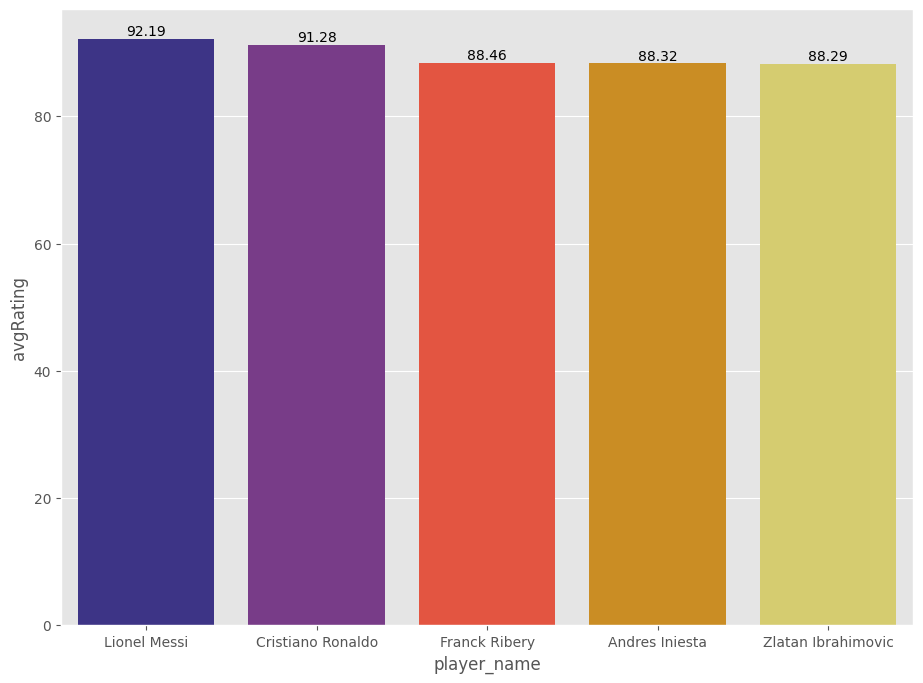

In [86]:

plt.figure(figsize = (11,8))
ax=sns.barplot(x = 'player_name', y = 'avgRating', data = top_players, palette='CMRmap');

ax.bar_label(ax.containers[0])


In [51]:
#Top10 teams based on average goals
top10=pd.read_sql("""SELECT t.team_api_id AS Team_id, t.team_long_name AS Team, m.season, c.name AS Country, 
COUNT(m.home_team_api_id) AS no_of_matches,
ROUND(AVG(m.home_team_goal + m.away_team_goal),2) AS Average_goals
FROM Team t, Match m, Country c
WHERE t.team_api_id = m.home_team_api_id AND m.country_id = c.id 
GROUP BY t.team_api_id
ORDER BY 6 DESC
LIMIT 10;""",conn)
top10


,Team_id,Team,season,Country,no_of_matches,Average_goals
0,8633,Real Madrid CF,2008/2009,Spain,152,4.29
1,8634,FC Barcelona,2008/2009,Spain,152,3.92
2,8640,PSV,2008/2009,Netherlands,136,3.65
3,8483,Blackpool,2010/2011,England,19,3.53
4,9823,FC Bayern Munich,2008/2009,Germany,136,3.51
5,8457,Dunfermline Athletic,2011/2012,Scotland,19,3.47
6,10228,SC Heerenveen,2008/2009,Netherlands,136,3.45
7,10192,BSC Young Boys,2008/2009,Switzerland,143,3.39
8,8573,KV Oostende,2013/2014,Belgium,33,3.39
9,8721,VfL Wolfsburg,2008/2009,Germany,136,3.35


### finding average of overall rating ,potential and weight for each value of height

In [89]:
height = pd.read_sql("""SELECT CASE
                                        WHEN ROUND(height)<165 then 165
                                        WHEN ROUND(height)>195 then 195
                                        ELSE ROUND(height)
                                        END AS calc_height, 
                                       
                                        (avg(paGrouped.avgOverallRating)) AS avgOverallRating,
                                        (avg(paGrouped.avgPotential)) AS avgPotential,
                                        AVG(weight) AS avgWeight 
                            FROM PLAYER pl
                            LEFT JOIN (SELECT pa.player_api_id, 
                                        avg(pa.overall_rating) AS avgOverallRating,
                                        avg(pa.potential) AS avgPotential  
                                        FROM Player_Attributes pa
                                        GROUP BY pa.player_api_id) 
                                        AS paGrouped ON pl.player_api_id = paGrouped.player_api_id
                            GROUP BY calc_height
                            ORDER BY calc_height
                                ;""", conn)
height

,calc_height,avgOverallRating,avgPotential,avgWeight
0,165.0,67.365543,73.327754,139.459459
1,168.0,67.500518,73.124182,144.127119
2,170.0,67.726903,73.379056,147.799007
3,173.0,66.980272,72.848746,152.824528
4,175.0,66.805204,72.258774,156.111953
5,178.0,66.367212,71.943339,160.665547
6,180.0,66.419053,71.846394,165.261527
7,183.0,66.634380,71.754555,170.167861
8,185.0,66.928964,71.833475,174.636933
9,188.0,67.094253,72.151949,179.278161


<AxesSubplot: title={'center': 'Potential vs Height'}, xlabel='calc_height'>

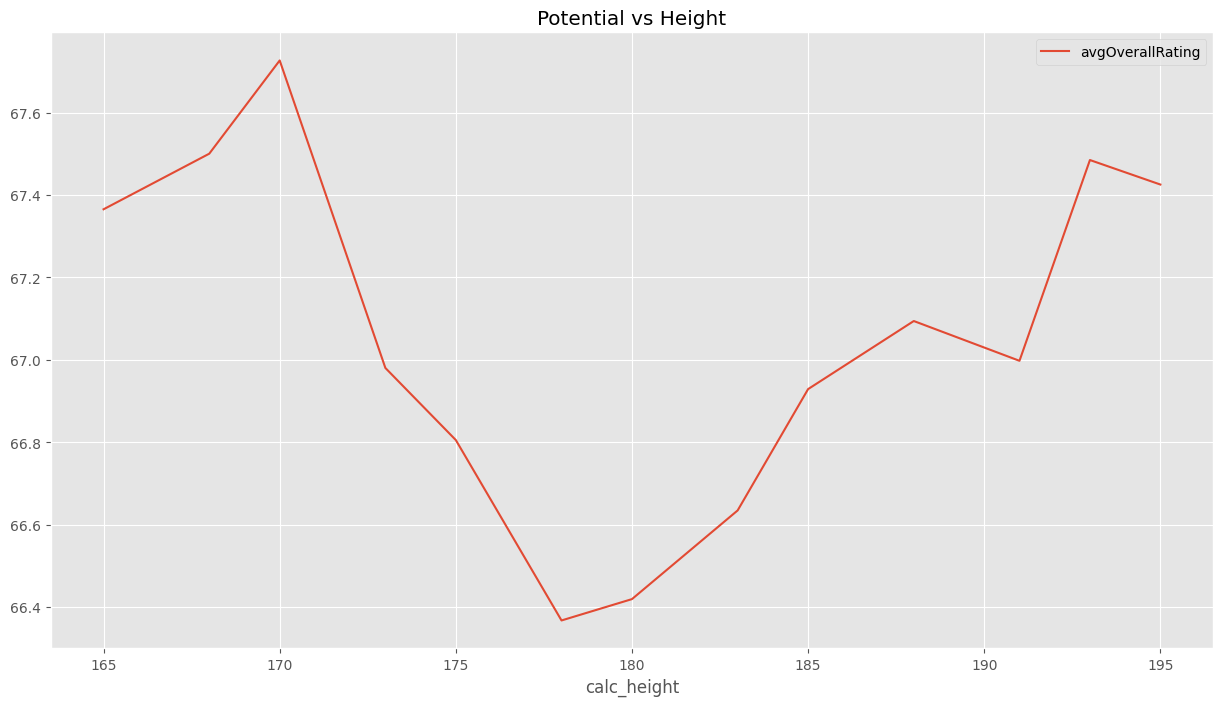

In [90]:
height.plot(x='calc_height',y='avgOverallRating',figsize=(15,8),title='Potential vs Height')